# Atividade 1 — Árvore de decisão e k-NN

**Índice**

  - [Parte 1: Uma Base Fácil](#Parte-1:-Uma-Base-Fácil)
    - [Conhecendo a base](#Conhecendo-a-base)
    - [Descrição da base](#Descrição-da-base)
    - [Comparando classificadores](#Comparando-classificadores)
  - [Parte 2: Sua Vez](#Parte-2:-Sua-Vez)
  - [Parte 3: Uma Nova Base](#Parte-3:-Uma-Nova-Base)
    - [Particionamento](#Particionamento)
    - [Ajuste de hiperparâmetros da árvore de decisão](#Ajuste-de-hiperparâmetros-da-árvore-de-decisão)
  - [Parte 4: Sua Vez](#Parte-4:-Sua-Vez)
  - [Parte 5: Teste Final](#Parte-5:-Teste-Final)
  - [Parte Final: Entrega](#Parte-Final:-Entrega)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris, load_breast_cancer

sns.set()

## Parte 1: Uma Base Fácil

### Conhecendo a base

A base `Iris` é uma base *toy* e bem fácil de classificar.

O termo "fácil" pode significar várias coisas. Neste caso, a base `Iris` é fácil porque, embora a base possua quatro atributos de entrada e exemplos em três classes, quase todos os exemplos podem ser classificados por um separador linear usando apenas dois atributos.

Desta vez vamos carregar a base `Iris` com a biblioteca `sklearn`.

In [ ]:
from sklearn.datasets import load_iris

> **Carregue** a base `Iris` usando a função `load_iris`.

In [ ]:
iris = ...

O `sklearn` tem um tipo chamado `Bunch` que guarda os dados na forma de tensores (do NumPy) e adiciona algumas metainformações relevantes.

In [ ]:
type(iris)

A função `dir` expõe o conteúdo desse objeto.

Os atributos de entrada encontram-se na propriedade `.data`.

In [ ]:
type(iris.data)

Os atributos de saída encontram-se na propriedade `.target`.

In [ ]:
type(iris.target)

No `Bunch`, os rótulos já são numéricos:

In [ ]:
np.unique(iris.target)

Os nomes dos rótulos podem ser encontrados no vetor `.target_names`.

In [ ]:
iris.target_names

> **Faça a associação** entre os rótulos numéricos e as strings. Isto é, quais são os nomes (string) da classe 0, da clase 1 e da classe 2?


> *Dica*: você pode usar um laço de repetição sobre os valores únicos de `iris.target` e a saída pode ser assim:

    Rótulo 0: setosa
    Rótulo 1: versicolor
    Rótulo 2: virginica

> **Identifique** quais são as classes (valores numéricos) dos exemplos que ocupam os índices 0, 15, 36, 51, 89, 101, 115 e 149 da matriz de dados.
>
> *Dica:* a lista a seguir pode ajudar: `[0, 15, 36, 51, 89, 101, 115, 149]`.
>
> *Dica ²:* copie o código abaixo em uma célula e execute-o abaixo se precisar de mais ajuda:

    import base64
    segredo = b'VmMgcG9kZSBzZWxlY2lvbmFyIHVtIGNvbmp1bnRvIGRlIGVsZW1lbnRvcyBkZSB1bSB2ZXRvciBO\ndW1QeSBzZSBpbmRleGFyIG8gdmV0b3IgY29tIHVtYSBsaXN0YSBkZSBpbmRpY2VzLgoKRXhlbXBs\nbzoKCmFsZmFiZXRvID0gW2NocihfKSBmb3IgXyBpbiByYW5nZShvcmQoJ2EnKSwgb3JkKCd6Jykg\nKyAxKV0KYWxmYWJldG8gPSBucC5hcnJheShhbGZhYmV0bykKcHJpbnQoYWxmYWJldG8pCgpwYWxh\ndnJhID0gYWxmYWJldG9bWzAsIDEyLCAxMiwgM11dCnByaW50KCcnLmpvaW4ocGFsYXZyYSkp\n'
    print(base64.decodebytes(segredo).decode())

> **Identifique** quais são as classes (nomes, strings) dos exemplos que ocupam os índices 0, 15, 36, 51, 89, 101, 115 e 149 da matriz de dados.

Excelente. Lembre-se disso quando precisar conhecer os detalhes de um conjunto específico de exemplos da amostra.

### Descrição da base

Vamos verificar valores de média e desvio padrão dos atributos da base.

> **Calcule a média** dos quatro atributos, usando `np.mean` ao longo do eixo 0.
>
> *Dica*: o resultado deverá ser próximo do seguinte: `[5.843, 3.057, 3.758, 1.199]`.

Embora o NumPy faça todos os cálculos que precisamos, ele não é muito bom para visualizar e manipular os resultados. O melhor é criar um *data frame* com base nos dados.

> **Execute a célula** a seguir pra criar um *data fame* da base `Iris`.

In [ ]:
# Cria um data frame contendo os atributos de entrada
iris_df = pd.DataFrame(data=iris.data,             # Atributos de entrada
                       columns=iris.feature_names, # Nomes das colunas
                      )

# Acrescenta as classes
iris_df['species'] = iris.target_names[iris.target]

# Mostra o resultado
iris_df

O *dataframe* possui um método muito oportuno, `describe`, que mostra uma descrição estatística de todas as colunas que possuem valor numérico.

> **Execute a célula** a seguir para ver uma descrição dos atributos.

In [ ]:
iris_df.describe()

A descrição contém o seguinte, linha a linha:

- `count` é o número de valores numéricos. Será 150 para todas as colunas porque o *data frame* está totalmente preenchido por valores numéricos. Se houvesse valores ausentes, então algumas colunas teriam menos que 150 valores numéricos
- `mean` é a média de cada coluna (atributo)
- `std` é o desvio padrão
- `min` é o menor valor de cada coluna
- `25%` é o primeiro quartil
- `50%` é a mediana
- `75%` é o terceiro quartil
- `max` é o maior valor de cada coluna

São 8 linhas com descritores estatísticos. Eles podem ser bem úteis...

...e no entanto, seria mais apropriado visualizar esse resultado separadamente para exemplos de cada classe. Isso pode ser feito se, primeiro, nós agruparmos as linhas do *data frame* por espécie.

O método `groupby` faz isso. Ele retornar um objeto que representa um agrupamento e pode ser usado, por exemplo, para obtermos uma descrição estatística com `describe`.

Se agruparmos o *data frame* anterior por espécie e, depois, gerarmos uma descrição estatística, o resultado será um *data frame*  que contém 3 linhas (uma para cada espécie) e 3×8 colunas (3 grupos dos 8 descritores estatísticos obtidos na célula acima). O melhor jeito de visualizar esse *data frame*  é "rotacioná-lo" (ou, melhor dizendo, transpô-lo).

> **Execute a célula** a seguir para obter uma descrição estatística do *data frame* separadamente por classes.

In [ ]:
iris_df.groupby('species').describe().T

Você consegue perceber que esse conjunto é relativente "fácil"?

Talvez fique mais evidente com um diagrama.

> **Execute a célula** abaixo para gerar um *pairplot* da base `Iris`.

In [ ]:
sns.pairplot(iris_df, hue='species');

Um *pairplot* é uma coleção de gráficos de espalhamento dos exemplos de uma base. Associado ao parâmetro `hue=species`, o Seaborn é capaz de gerar um conjunto de gráficos destacando quais exemplos pertencem a quais classes.

Na diagonal do *pairplot*, temos histogramas dos atributos. Considere, por exemplo, o histograma de *petal width (cm)*. Ele deve se parecer com o seguinte (se a imagem não aparecer no Colaboratory, verifique no link [https://i.imgur.com/H4XFggz.png](https://i.imgur.com/H4XFggz.png)):

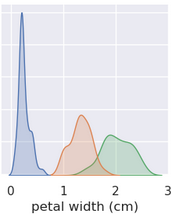

A altura do histograma tem relação com a contagem de exemplos que possuem aquele valor. Existe uma clara separação entre a curva azul e as demais, com um pico bem distinto em torno do valor 0,2. A maior largura de pétala dentre todas as flores Setosa (azul) é menor que todas as larguras de pétala de todas as outras.

In [ ]:
iris_df.loc[iris_df['species'] == 'setosa', 'petal width (cm)'].max()

In [ ]:
(iris_df.loc[iris_df['species'] == 'versicolor', 'petal width (cm)'].min(),
     iris_df.loc[iris_df['species'] == 'virginica', 'petal width (cm)'].min())

In [ ]:
iris.feature_names

In [ ]:
iris.data

Isso significa que, usando um único atributo, seria possível separar (classificar) corretamente todos os exemplos da classe Setosa. Ainda seria necessário separar Versicolor de Virginica, mas já é um começo.

Você pode tentar fazer isso manualmente. Analise os gráficos e tente escolher, manualmente, uma regra para classificar exemplos das flores. Sua regra deve ter a forma `if..else` e fazer referência a um ou mais atributos das flores, comparando com valores fixos.

Por exemplo:

```Python
def clf_manual(x):
    if x[3] > 1.6:
        # Se "petal width > 1.6", então o
        # exemplo é da classe virginica
        return 2
    elif np.random.rand() < 0.5:
        # Senão, classifica com 50% de chance como setosa...
        return 0
    else:
        # E com 50% de chance como versicolor
        return 1
```

> **Escreva sua função** `clf_manual` que recebe como entrada um vetor NumPy representando os quatro valores dos atributos de uma flor e devolve `0`, `1` ou `2`, representando a classe predita para esse exemplo.

In [ ]:
def clf_manual(x):
    pass  # remova este comando e escreva sua função

> **Quando sua função estiver pronta**, execute a célula abaixo para calcular a acurácia do seu classificador.

In [ ]:
if type(clf_manual(iris.data[0])) != int:
    print("Sua função não retornou um tipo de dado esperado.")
    print("Sua função deve retornar um inteiro com valor 0, 1 ou 2.")
    print("0 - se o exemplo a ser classificado for setosa.")
    print("1 - se o exemplo a ser classificado for versicolor.")
    print("2 - se o exemplo a ser classificado for virginica.")
else:
    y_pred = []
    for x in iris.data:
        y_pred.append(clf_manual(x))

    print(f"Acurácia do seu classificador: {100 * accuracy_score(iris.target, y_pred):.2f}%")

Com pouco esforço, você deve conseguir aproximadamente 95% de acurácia.

### Comparando classificadores

Vamos testar dois classificadores na base `Iris`:

- k-Vizinhos mais Próximos
- Árvores de decisão

Vamos primeiro a base de dados em duas partes: um conjunto de treino e um de teste.

O particionamento pode ser feito pela função `train_test_split`. Nós vamos usar os seguintes parâmetros:

- 1º parâmetro (não nomeado): uma matriz contendo os atributos de entrada
- 2º parâmetro (não nomeado): um vetor contendo o atributo de saída (classe)
- `stratify`: um vetor contendo informações das classes para *estratificar* o particionamento. Isso garante que os dois conjuntos resultantes terão aproximadamente a mesma distribuição de exemplos por classe que o conjunto original
- `test_size`: tamanho do conjunto de teste; vamos especificar 30%
-  `random_state`: uma semente para geração de números pseudoaleatórios, garantindo que o resultado obtido será o mesmo sempre que o comando for executado

Como saída teremos dois subconjuntos. O par `(X_train, y_train)` contém os dados de treinamento (entrada, saída) e o par `(X_test, y_test)` contém os dados de teste.

In [ ]:
from sklearn.model_selection import train_test_split

> **Execute a célula** abaixo para obter o particionamento.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    stratify=iris.target,
                                                    test_size=0.3,
                                                    random_state=1337)

Como ficaram os conjuntos?

In [ ]:
print("Exemplos no subconjunto de treino:", len(X_train))
print("Exemplos no subconjunto de Teste:", len(X_test))

E quantos exemplos de cada classe temos no conjunto de treinamento?

In [ ]:
np.histogram(y_train, bins=3)[0]

E no conjunto de teste?

In [ ]:
np.histogram(y_test, bins=3)[0]

Exatamente 35 de cada classe no treino e exatamente 15 de cada classe no teste. Legal.

Agora você irá treinar e testar a árvore de decisão e o k-NN.

> **Treine e teste** uma árvore de decisão no particionamento obtido. Não mude os hiperparâmetros. Qual a acurácia do classificador?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
# continue...
# clf.fit......

> **Treine e teste** um k-NN árvore de decisão no particionamento obtido. Não mude os hiperparâmetros. Qual a acurácia do classificador?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
# continue...
# clf.fit......

> **Explique com suas palavras** a diferença entre os desempenhos dos dois modelos. Você acha que foi significativa? Você pode formular uma hipótese quanto ao motivo?
>
> *Dica:* esta pergunta é exploratória. Você não precisa respondê-la corretamente para ganhar nota nesta atividade. Tente respondê-la da melhor forma possível. Ao final do período letivo você poderá revisar sua resposta.

*Edite esta célula e escreva sua resposta.*

## Parte 2: Uma Nova Base

Agora nós utilizaremos a base **Breast Cancer** disponível no `sklearn`, mas originário do repositório da UCI (https://archive.ics.uci.edu/ml/datasets/breast+cancer). Trata-se de uma base de dados que foi obtida a partir de imagens digitalizadas de massas mamárias e as classes descrevem dois tipos de tumores: maligno (harmful) e não maligno (not harmful). Os atributos descrevem características dos núcleos celulares presentes nas imagens.

No total, são **30 atributos** ordenados: raio médio, textura média, perímetro médio, área média, suavidade média, compacidade média, concavidade média, pontos côncavos médios, simetria média, dimensão fractal média, erro de raio, erro de textura, erro de perímetro, erro de área, erro de suavidade, erro de compactação, erro de concavidade, erro de pontos côncavos, erro de simetria, erro de dimensão fractal, pior raio, pior textura, pior perímetro, pior área, pior suavidade, pior compacidade, pior concavidade, piores pontos côncavos, pior simetria e pior dimensão fractal) e um alvo (tipo de câncer).

Esta base não é tão simples quanto a `Iris`, mas ainda trata-se de uma base que exige pouco esforço para produzir classificadores que dão bons resultados

> **Carregue a base** `breast` usando a função `load_breast_cancer` do `sklearn`.

In [ ]:
from sklearn.datasets import load_breast_cancer

breast = ...

> **Verifique** a base de dados: número de atributos, de instâncias, distribuição das classes etc.

### Particionamento

Desta vez nós teremos **três** conjuntos.

- Um conjunto de **teste** contendo 20% dos exemplos da amostra original. O objetivo desse conjunto é permitir testar o modelo com o melhor conjunto de hiperparâmetros em exemplos que nunca fizeram parte do processo de treinamento
- Um conjunto de **treino** contendo 60% dos exemplos da amostra original. O objetivo desse conjunto é treinar diversos modelos com hiperparâmetros diferentes
- Um conjunto de **validaçao** contendo 20% dos exemplos da amostra original. O objetivo desse conjunto é validar os hiperparâmetros

A primeira coisa a fazer é separar a amostra em dois:

- Um subconjunto que conterá os exemplos de treino e também os de validação
- Um subconjunto que conterá apenas os exemplos de teste

> **Separe os exemplos de teste** dos exemplos de treino e de validação utilizando a função `train_test_split`. Especifique 20% (0.2) para o tamanho do conjunto de teste `test_size`. Não se esqueça de estratificar os exemplos pelas classes usando `statify`.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainval, y_trainval, X_test, y_test = train_test_split(
    breast.data,
    breast.target,
    test_size=...,
    stratify=...,
    random_state=2024
)

Se você fez corretamente, então os conjuntos deverão ter as seguintes estatísticas:

> **Execute a célula** abaixo para fazer uma verificação *rápida* do particionamento. Se a célula imprimir que os conjuntos "parecem corretos", então provavelvemente deu tudo certo. Caso contrário volte e corrija.

In [ ]:
medias_teste = np.array([1.43478860e+01, 1.90907895e+01, 9.32684211e+01, 6.71608772e+02,
       9.61278070e-02, 1.00932807e-01, 8.51113833e-02, 4.83902895e-02,
       1.80421930e-01, 6.21734211e-02, 3.94149123e-01, 1.17173070e+00,
       2.76943860e+00, 4.02096930e+01, 6.92734211e-03, 2.51628596e-02,
       3.02007254e-02, 1.14363421e-02, 2.14125965e-02, 3.74634035e-03,
       1.63641316e+01, 2.52379825e+01, 1.07485614e+02, 8.79569298e+02,
       1.30909561e-01, 2.50814386e-01, 2.68269632e-01, 1.12337456e-01,
       2.96877193e-01, 8.33307895e-02])

medias_treino = np.array([1.40720220e+01, 1.93394725e+01, 9.16434725e+01, 6.50700000e+02,
       9.64185275e-02, 1.05194901e-01, 8.97233253e-02, 4.90516505e-02,
       1.81347253e-01, 6.29540000e-02, 4.07933846e-01, 1.22815890e+00,
       2.89026747e+00, 4.03689956e+01, 7.06945055e-03, 2.55571319e-02,
       3.23178943e-02, 1.18862835e-02, 2.03242462e-02, 3.80707143e-03,
       1.62454022e+01, 2.57872747e+01, 1.07204989e+02, 8.80837143e+02,
       1.32734154e-01, 2.55129604e-01, 2.73170349e-01, 1.15174662e-01,
       2.88371429e-01, 8.40999121e-02])

if X_trainval.shape != (455, 30):
    print("O formato de `X_trainval' ficou incorreto.")
elif (y_trainval == 1).sum() != 285:
    print("O número de exemplos da classe 1 no conjunto de treino em `X_trainval' está errado.")
    print("Você usou estratificação corretamente no particionamento?")
elif any(np.abs(X_trainval.mean(axis=0) - medias_treino) > 1e-5):
    print("Os valores de `X_trainval' têm a média errada e parecem incorretos.")
    print("Você especificou a semente aleatória `2024' e manteve a estratificação?")
else:
    print("À primeira vista os dados de `X_trainval' parecem corretos!")

if X_test.shape != (114, 30):
    print("O formato de `X_test' ficou incorreto.")
elif (y_test == 1).sum() != 72:
    print("O número de exemplos da classe 1 no conjunto de treino em `X_test' está errado.")
    print("Você usou estratificação corretamente no particionamento?")
elif any(np.abs(X_test.mean(axis=0) - medias_teste) > 1e-5):
    print("Os valores de `X_test' têm a média errada e parecem incorretos.")
    print("Você especificou a semente aleatória `2024' e manteve a estratificação?")
else:
    print("À primeira vista os dados de `X_test' parecem corretos!")

Agora vamos dividir o conjunto `X_trainval` em um conjunto de **treino** e um conjunto de **validação**.

> **Particione o conjunto** `X_trainval` em um conjunto de treino e um conjunto de validação usando os seguintes parâmetros:
>
> - Tamanho do conjunto de teste: 25% (0.25)
> - Estratificação: de acordo com as classes em `y_trainval`
> - Semente aleatória: `25`

In [ ]:
X_train, X_val, y_train, y_val = ...

Verifique o particionamento. O conjunto de treino deverá ter 341 exemplos e o conjunto de validação deverá ter 114 exemplos. Além disso, deverá haver 214 exemplos da classe 1 no conjunto de treino e 71 no conjunto de validação.

### Ajuste de hiperparâmetros da árvore de decisão

O modelo de árvore de decisão possui alguns parâmetros. Neste exercício, vamos ajustar apenas o hiperparametro `max_depth`, que especifica a profundidade máxima da árvore.

O procedimento para ajustar os hiperparâmetros é relativamente simples. Primeiro, precisamos escolher um conjunto de valores a serem testados. Vamos testar árvores com alturas máximas entre 2 a 5. Além disso, o valor `None` será usado.

- Quando `max_depth=None`, o algoritmo expande a árvore até que todas as folhas sejam puras ou até que cada folha contenha um número de exemplos menor do que o valor especificado no hiperparâmetro `min_samples_split`
- Quando `max_depth` é um valor numérico, então a árvore é expandida até no máximo essa altura/profundidade

Por exemplo, poderíamos gerar as seguintes árvores:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_com_altura_maxima_2 = DecisionTreeClassifier(max_depth=2)
arvore_com_altura_maxima_3 = DecisionTreeClassifier(max_depth=3)
arvore_com_altura_maxima_4 = DecisionTreeClassifier(max_depth=4)
arvore_com_altura_maxima_5 = DecisionTreeClassifier(max_depth=5)
arvore_com_altura_maxima_Indeterminada = DecisionTreeClassifier(max_depth=None)

O passo seguinte seria treinar cada uma dessas árvores no conjunto de treinamento e depois testá-las no conjunto de validação. A que produzisse a melhor métrica de acurácia seria a que consideramos o melhor valor do hiperparâmetro.

Entretanto, esse procedimento é um tanto tosco e um pouco preguiçoso. Temos todos os recursos de uma linguagem de programação à disposição. Na verdade, o `sklearn` possui algumas funções que quase automatizam todo esse processo. Mas vamos começar com uma lista:

In [ ]:
alturas = [2, 3, 4, 5, None]

Agora podemos iterar essa lista treinando e testando diferentes árvores. Vamos guardar as acurácias em uma lista de acurácias.

> **Execute a célula** abaixo para treinar as árvores e validá-las no conjunto de validação.

In [ ]:
acc_train = []
acc_val = []

for h in alturas:
    # Instancia um classificador com o hiperparâmetro desejado
    clf = DecisionTreeClassifier(random_state=1234, max_depth=h)

    # Treina no conjunto de treinamento
    clf.fit(X_train, y_train)

    # Testa no conjunto de validação
    y_pred = clf.predict(X_val)

    # Calcula a acurácia
    acc = accuracy_score(y_val, y_pred)

Hmm... nada foi impresso e nada foi armazenado.

> **Modifique a célula acima** para guardar, na lista `acc_val`, os valores de acurácias obtidos pela árvore com as diferentes alturas máximas *no conjunto de validação*.
>
> *Dica*: o resultado deverá ser *aproximadamente*, 90%, 92%, 91%, 89% e 89%. Se você obtiver um valor diferente, o motivo mais provável é que você se esqueceu de especificar uma semente aleatória para o construtor da árvore (`random_state=1234`). O segundo motivo mais provável é que seu particionamento ficou diferente do gabarito.

Se você obteve o resultado esperado, então existem duas perguntas a se fazer agora:

1. Está havendo *overfitting* ou *undefitting* com algum valor do hiperparâmetro?
1. Qual seria o valor ideal de `max_depth`?

Para responder ambas as perguntas, precisamos comparar a acurácia no conjunto de treino com a acurácia no conjunto de validação.

> **Modifique novamente a célula acima** para testar o modelo não apenas no conjunto de validação, mas também no conjunto de treino. Guarde os valores de acurácia na lista `acc_train`.
>
> *Dica*: o resultado deverá ser *aproximadamente* 97%, 98,5%, 99%, 100% e 100%.

In [ ]:
acc_train

> **Execute a célula** abaixo para visualizar um gráfico dos hiperparâmetros da árvore.

In [ ]:
import matplotlib.pyplot as plt

# Converte os números em strings (necessário por causa do None)
labels = [str(i) for i in alturas]

# Define um tamanho para a figura
plt.figure(figsize=(10,6));

# Define um título para a figura
plt.title('Curva de acurácia para diferentes valores de max_depth')

# Plota a curva do  treino
plt.plot(labels, acc_train, label='treino');

# Plota a curva da validação
plt.plot(labels, acc_val, label='validação');

# Define rótulos para os eixos
plt.xlabel('max_depth');
plt.ylabel('Acurácia');

# Adiciona uma legenda usando os "label"s especificados acima
plt.legend();

# Especifica um intervalo de exibição do eixo Y. Isso é fundamental em
# várias situações, especialmente nas seguintes
#  1. Quando queremos mostrar vários resultados, é importante que todos os
#     gráficos estejam na mesma escala para podermos fazer a comparação
#     (não é o caso atual; aqui temos apenas um gráfico com duas curvas)
#  2. Quando o intervalo padrão pode levar a conclusões incorretas. É o
#     nosso caso. Todas as acurácias mostradas no gráfico abaixo são
#     muito elevadas e a escala selecionada pelo PyPlot pode passar a
#     impressão de que existe uma diferença muito mais significativa
#     entre o treino e a validação.
plt.ylim(.75, 1.01);

## Parte 3: Sua Vez

Agora é com você.

Treine um modelo k-NN e faça ajuste de hiperparâmetros e validação dos do número de vizinhos e do parâmetro `p` da métrica `minkowski`.

Use os conjuntos de treino e de validação especificados anteriormente.

## Parte 4: Teste Final

Agora que você validou vários modelos, está na hora de fazer o teste final.

Para o testa final, você deverá treinar o modelo **com o máximo de dados de treinamento possível**. Isso significa usar todos os exemplos que não estão no conjunto de teste, que foi mantido oculto até aqui.

**Lembrando**, você tem quatro conjuntos:

- O par `breast.data,breast.target` contém a totalidade da sua amostra;
- O par `X_test,y_test` contém sua sub-amostra com os dados de teste;
- O par `X_train,y_train` contém sua sub-amostra com os dados de treinamento (durante o processo de validação);
- O par `X_val,y_val` contém sua sub-amostra com os dados de validação (durante o processo de validaçao).

Agora você irá juntar os dados dos pares `X_train,y_train` e `X_val,y_val` para o teste final. Se você não mexeu nas variáveis anteriores, então esses dados já estão guardados no par `X_trainval,y_trainval`.

In [ ]:
X_train, y_train = X_trainval, y_trainval

> **Treine os dois modelos** no conjunto final de treinamento, usando os hiperparâmetros que você selecionou nas partes anteriores.

> **Teste os dois modelos** no conjunto de teste.

## Parte Final: Entrega

Todo esse procedimento nos deu:

- Os valores ideais dos hiperparâmetros na base `breast`;
- O desempenho esperado do modelo final.

O último passo é treinar o modelo para ser posto em produção.

Nós não vamos colocar o modelo em produção, pois não temos um cliente de verdade ou uma publicação científifca a ser feita neste momento, mas vamos simular o processo inteiro.

Para gerar o modelo final, nós usamos **o máximo possível de dados**. Ou seja, toda a amostra. Nenhum dos subconjuntos gerados anteriormente.

> **Treine o modelo final do k-NN** usando os hiperparâmetros escolhidos e a **totalidade** dos dados da base `breast`.

> **Treine o modelo final da árvore de decisão** usando os hiperparâmetros escolhidos e a **totalidade** dos dados da base `breast`.

> **Bônus**: gere um arquivo que guarda os modelos treinados (persistência). O ideal é uma técnica de *marshalling*, mas você pode usar um `pickle`. A desvantagem do `pickle` é que essa técnica é insegura, pois ela salva qualquer código Python que poderá ser executado quando o `pickle` for carregado, mas é uma opção rápida.